In [ ]:
# Fold
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

img_width, img_height = 256, 256
train_data_dir = "data/train"
validation_data_dir = "data/val"
nb_train_samples = 4125
nb_validation_samples = 466 
batch_size = 16
epochs = 50

model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 1))

"""
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 64, 64, 256)       295168    
_________________________________________________________________
block3_conv2 (Conv2D)        (None, 64, 64, 256)       590080    
_________________________________________________________________
block3_conv3 (Conv2D)        (None, 64, 64, 256)       590080    
_________________________________________________________________
block3_conv4 (Conv2D)        (None, 64, 64, 256)       590080    
_________________________________________________________________
block3_pool (MaxPooling2D)   (None, 32, 32, 256)       0         
_________________________________________________________________
block4_conv1 (Conv2D)        (None, 32, 32, 512)       1180160   
_________________________________________________________________
block4_conv2 (Conv2D)        (None, 32, 32, 512)       2359808   
_________________________________________________________________
block4_conv3 (Conv2D)        (None, 32, 32, 512)       2359808   
_________________________________________________________________
block4_conv4 (Conv2D)        (None, 32, 32, 512)       2359808   
_________________________________________________________________
block4_pool (MaxPooling2D)   (None, 16, 16, 512)       0         
_________________________________________________________________
block5_conv1 (Conv2D)        (None, 16, 16, 512)       2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        (None, 16, 16, 512)       2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        (None, 16, 16, 512)       2359808   
_________________________________________________________________
block5_conv4 (Conv2D)        (None, 16, 16, 512)       2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   (None, 8, 8, 512)         0         
=================================================================
Total params: 20,024,384.0
Trainable params: 20,024,384.0
Non-trainable params: 0.0
"""

# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in model.layers[:5]:
    layer.trainable = False

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

# Initiate the train and test generators with data Augumentation 
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

# Save the model according to the conditions  
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')


# Train the model 
model_final.fit_generator(
train_generator,
samples_per_epoch = nb_train_samples,
epochs = epochs,
validation_data = validation_generator,
nb_val_samples = nb_validation_samples,
callbacks = [checkpoint, early])



2.2.0
Started
dataSpecs =  [901, 719]
train_data[img].shape =  (1458, 385, 385, 3)
train_data[label].shape =  (1458, 2)
validation_data[img].shape =  (162, 385, 385, 3)
valdiation_data[label].shape =  (162, 2)


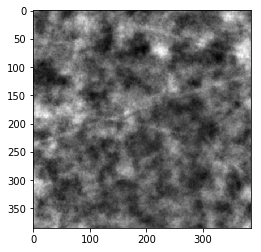

[[[[0.61960784 0.61960784 0.61960784]
   [0.58039216 0.58039216 0.58039216]
   [0.56862745 0.56862745 0.56862745]
   ...
   [0.34901961 0.34901961 0.34901961]
   [0.3254902  0.3254902  0.3254902 ]
   [0.30980392 0.30980392 0.30980392]]

  [[0.57254902 0.57254902 0.57254902]
   [0.54509804 0.54509804 0.54509804]
   [0.54901961 0.54901961 0.54901961]
   ...
   [0.35294118 0.35294118 0.35294118]
   [0.3254902  0.3254902  0.3254902 ]
   [0.30588235 0.30588235 0.30588235]]

  [[0.50980392 0.50980392 0.50980392]
   [0.49803922 0.49803922 0.49803922]
   [0.51764706 0.51764706 0.51764706]
   ...
   [0.37254902 0.37254902 0.37254902]
   [0.34509804 0.34509804 0.34509804]
   [0.31372549 0.31372549 0.31372549]]

  ...

  [[0.48235294 0.48235294 0.48235294]
   [0.48235294 0.48235294 0.48235294]
   [0.4745098  0.4745098  0.4745098 ]
   ...
   [0.6        0.6        0.6       ]
   [0.58431373 0.58431373 0.58431373]
   [0.62352941 0.62352941 0.62352941]]

  [[0.45098039 0.45098039 0.45098039]
   [0.4

COMPILE

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 383, 383, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 191, 191, 32)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 189, 189, 32)      9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 94, 94, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 92, 92, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 44, 44, 32)        9248      
_

1458/1458 [==============================] - 6s 4ms/step - loss: 6.3790e-04 - acc: 1.0000
Epoch 62/100
1458/1458 [==============================] - 6s 4ms/step - loss: 4.0229e-04 - acc: 1.0000
Epoch 63/100
1458/1458 [==============================] - 6s 4ms/step - loss: 5.6049e-04 - acc: 1.0000
Epoch 64/100
1458/1458 [==============================] - 6s 4ms/step - loss: 5.1074e-04 - acc: 1.0000
Epoch 65/100
1458/1458 [==============================] - 6s 4ms/step - loss: 4.1575e-04 - acc: 1.0000
Epoch 66/100
1458/1458 [==============================] - 6s 4ms/step - loss: 2.3330e-04 - acc: 1.0000
Epoch 67/100
1458/1458 [==============================] - 6s 4ms/step - loss: 2.0861e-04 - acc: 1.0000
Epoch 68/100
1458/1458 [==============================] - 6s 4ms/step - loss: 2.2126e-04 - acc: 1.0000
Epoch 69/100
1458/1458 [==============================] - 7s 5ms/step - loss: 1.5149e-04 - acc: 1.0000
Epoch 70/100
1458/1458 [==============================] - 6s 4ms/step - loss: 3.1110e-

In [8]:
# fold
import cv2
import glob
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import optimizers
# For some reason I have to tell it to use TensorFlows dimension ordering
from keras import backend as K
K.set_image_dim_ordering('tf')

def get_images(path, dataSpecs):
    fileList = glob.glob(path) #'BengaliBMPConvert/*.bmp'   
    num = len(fileList)
    dataSpecs['classLength'].append(len(fileList))
    x = np.array([(cv2.imread(fname)) for fname in fileList])
    return x

def get_labels_one_hot(num_classes, class_id, num_samples):
    x = np.zeros((num_samples, num_classes))
    x[np.arange(num_samples),class_id] = 1
    return x
 
    
    
def main():
    import keras
    print(keras.__version__)
    
    # Get images and labels
    print('Started')
    data = {'img': 0, 'label': 0}
    dataSpecs = {'classLength': []}
    dataSpecs['classLength'] = []
    data['img'] = np.concatenate((
            #get_images('/vol/vssp/mammo2/will/data/simulated/calcs/small_sample/0/*', dataSpecs), # Class 0
            #get_images('/vol/vssp/mammo2/will/data/simulated/calcs/small_sample/1/*', dataSpecs) # Class 1
            get_images('/user/HS204/wm0015/student/allCalcs/0/*', dataSpecs), # Class 0
            get_images('/user/HS204/wm0015/student/allCalcs/1/*', dataSpecs) # Class 1
    ))  
    # Normalise
    data['img'] = data['img']/255
    
    print('dataSpecs = ', dataSpecs['classLength'])
    labels_bg = get_labels_one_hot(2, 0, dataSpecs['classLength'][0])  
    labels_calc = get_labels_one_hot(2, 1, dataSpecs['classLength'][1])
    data['label'] = np.concatenate((
            get_labels_one_hot(2, 0, dataSpecs['classLength'][0]), # Class 0 
            get_labels_one_hot(2, 1, dataSpecs['classLength'][1]) # Class 1
    ))
    # Drop from 3 colour channels to 1 (greyscale)
    if 1==2:
        data['img'] = data['img'][:,:,:,0]
        data['img'] = np.reshape(data['img'], (data['img'].shape[0],data['img'].shape[1],data['img'].shape[2],1))
        print('new data shape = ', data['img'].shape)
    
    
    
    
    # Shuffle data
    seed = 33
    np.random.seed(seed) # Has to be set before each use of random
    shuffleMask = np.random.permutation(data['img'].shape[0])    
    data['img'] = data['img'][shuffleMask, :, :, :]
    data['label'] = data['label'][shuffleMask, :]
    
    # Split traing and validation data        
    splitRatio = 0.9
    splitPoint = math.floor(data['img'].shape[0]*splitRatio)
    train_data = {'img': data['img'][0:splitPoint], 'label': data['label'][0:splitPoint]}
    validation_data = {'img': data['img'][splitPoint:], 'label': data['label'][splitPoint:]}
    print('train_data[img].shape = ', train_data['img'].shape)
    print('train_data[label].shape = ', train_data['label'].shape)
    print('validation_data[img].shape = ', validation_data['img'].shape)
    print('valdiation_data[label].shape = ', validation_data['label'].shape)
    
    # Print image    
    img_calc = train_data['img']   
    plt.imshow(img_calc[0], cmap='gray')
    plt.show()
    
    # Keras!
    model = Sequential()
    print(train_data['img']) 
    
    # Layer 1
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(385, 385, 3), data_format='channels_last'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Layer 2
    model.add(Conv2D(32, (3,3), activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Layer 3    
    model.add(Conv2D(32, (3,3), activation='relu'))  
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Layer 4     
    model.add(Conv2D(32, (3,3), activation='relu'))   
    model.add(MaxPooling2D(pool_size=(2, 2)))    
    # Layer 5     
    model.add(Conv2D(32, (3,3), activation='relu'))   
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Layer 6
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    
    print('COMPILE\n')
    sgd = optimizers.SGD(lr=5, decay=1e-6, momentum=0.9, nesterov=True)
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) #0.001
    model.compile(loss='binary_crossentropy',
            optimizer=adam,
            metrics=['accuracy']) # Accuracy will now be returned when evaluate is called
    
    model.summary()   
    print('TRAIN\n')
    # Train
    model.fit(train_data['img'], train_data['label'], 
           batch_size=100, epochs=100, verbose=1)
    
    # Evaluate
    score = model.evaluate(validation_data['img'], validation_data['label'], verbose=0)
    print('The score is......\n', score)
    
if __name__ == "__main__":
    main()

In [ ]:
# 3. Import libraries and modules
import numpy as np
from keras import backend as K
K.set_image_dim_ordering('th')
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
 
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train.shape)
print(X_train.shape)
 
# 7. Define model architecture
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
 
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
a = np.array([np.arange(9) for i in range(3)])
a = a + 2
print(a)
print(a.shape)
print('__')
b = np.random.permutation(a.shape[1])
print(b)
print(a[1,b])
print('\n\n')
np.random.seed(10)  # Has to be set before each use of random
a = a[:, np.random.permutation(a.shape[1])]
print(a)


In [ ]:
print('hello world')

In [ ]:
# Mutable objects such as lists act as call by reference
# Unmutable objects such as integers, strings act as call by value

def test (f):
    f[0] = 2
x = [1, 2, 3]
test(x)
print(x)

In [ ]:

def myFunc (x):
    x = x+[99]
    print(x, '\n')
def alterDict(x):
    x['test'] = [9,9,9]
def alterList(x):
    x = x + [7]
    
myDict = {'test': [1,2,3]}
print(myDict)
myFunc(myDict['test'])

print(myDict)
alterDict(myDict)
print(myDict)

y = [1,2,3]
alterList(y)
print('\n',y)
